In [ ]:

import zipfile
import os

# Path to your ZIP file
zip_file_path = r'C:\Users\PC-024\Documents\data22\covid193mtt.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    zip_ref.printdir()
    
    # Extract all files into a directory (optional)
    extract_path = r'C:\Users\PC-024\Documents\data22\extracted_covid19'
    zip_ref.extractall(extract_path)

# After extracting, list the files in the extracted folder
files = os.listdir(extract_path)
print(files)


In [6]:
import pandas as pd
import os
# Load the 'covid_19_clean_complete.csv' file
csv_path = os.path.join(extract_path, 'covid_19_clean_complete.csv')
df = pd.read_csv(csv_path)

# Show the first few rows
print(df.head())

# Summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

In [7]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check the conversion
print(df.head())

  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [ ]:
# Drop rows where 'Province/State' is missing
df_cleaned = df.dropna(subset=['Province/State'])

# Check the result
print(df_cleaned.info())


In [9]:
# Sorting the dataset by 'Date' to calculate daily changes
df_cleaned = df_cleaned.sort_values(by='Date')

# Calculate daily changes in Confirmed cases
df_cleaned['Daily_Confirmed'] = df_cleaned.groupby('Country/Region')['Confirmed'].diff().fillna(0)

# Calculate Mortality rate (Deaths / Confirmed)
df_cleaned['Mortality_Rate'] = df_cleaned['Deaths'] / df_cleaned['Confirmed']

# Calculate Recovery rate (Recovered / Confirmed)
df_cleaned['Recovery_Rate'] = df_cleaned['Recovered'] / df_cleaned['Confirmed']

# Check the new columns
print(df_cleaned[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Daily_Confirmed', 'Mortality_Rate', 'Recovery_Rate']].head())


          Date Country/Region  Confirmed  Deaths  Recovered  Daily_Confirmed  \
8   2020-01-22      Australia          0       0          0              0.0   
108 2020-01-22         France          0       0          0              0.0   
107 2020-01-22         France          0       0          0              0.0   
106 2020-01-22         France          0       0          0              0.0   
105 2020-01-22         France          0       0          0              0.0   

     Mortality_Rate  Recovery_Rate  
8               NaN            NaN  
108             NaN            NaN  
107             NaN            NaN  
106             NaN            NaN  
105             NaN            NaN  


In [10]:
# Replace NaN values in Mortality and Recovery Rate with 0
df_cleaned['Mortality_Rate'].fillna(0, inplace=True)
df_cleaned['Recovery_Rate'].fillna(0, inplace=True)

# Check the new columns after fixing NaN values
print(df_cleaned[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Daily_Confirmed', 'Mortality_Rate', 'Recovery_Rate']].head())


          Date Country/Region  Confirmed  Deaths  Recovered  Daily_Confirmed  \
8   2020-01-22      Australia          0       0          0              0.0   
108 2020-01-22         France          0       0          0              0.0   
107 2020-01-22         France          0       0          0              0.0   
106 2020-01-22         France          0       0          0              0.0   
105 2020-01-22         France          0       0          0              0.0   

     Mortality_Rate  Recovery_Rate  
8               0.0            0.0  
108             0.0            0.0  
107             0.0            0.0  
106             0.0            0.0  
105             0.0            0.0  


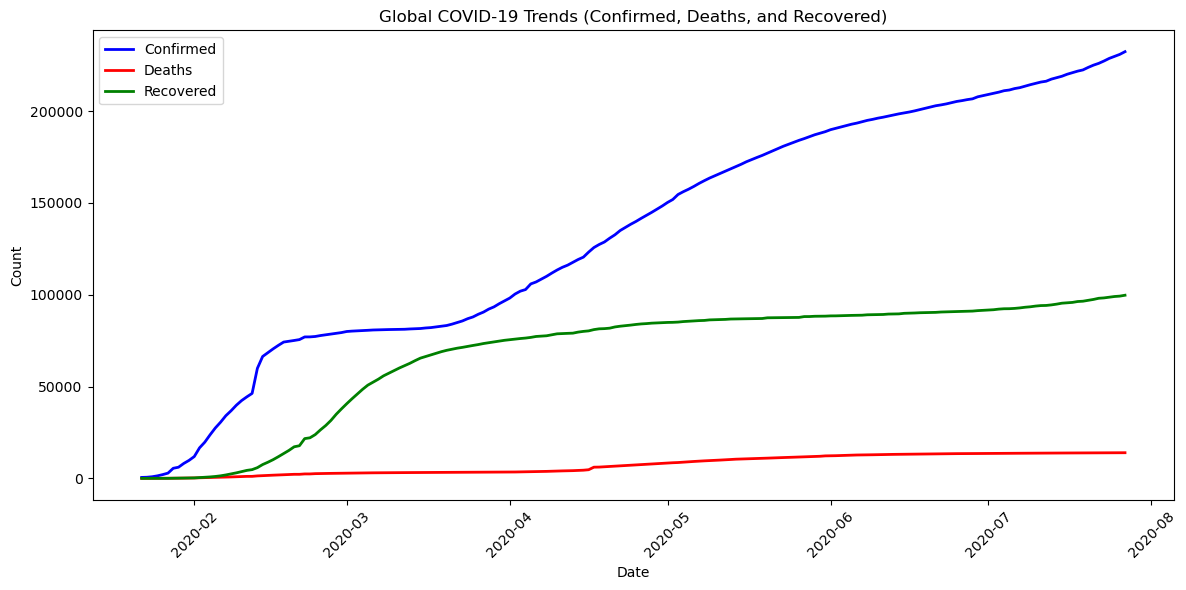

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Date' to get global trends
global_trends = df_cleaned.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Plot the trends over time
plt.figure(figsize=(12, 6))
plt.plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.plot(global_trends['Date'], global_trends['Deaths'], label='Deaths', color='red', linewidth=2)
plt.plot(global_trends['Date'], global_trends['Recovered'], label='Recovered', color='green', linewidth=2)
plt.title('Global COVID-19 Trends (Confirmed, Deaths, and Recovered)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


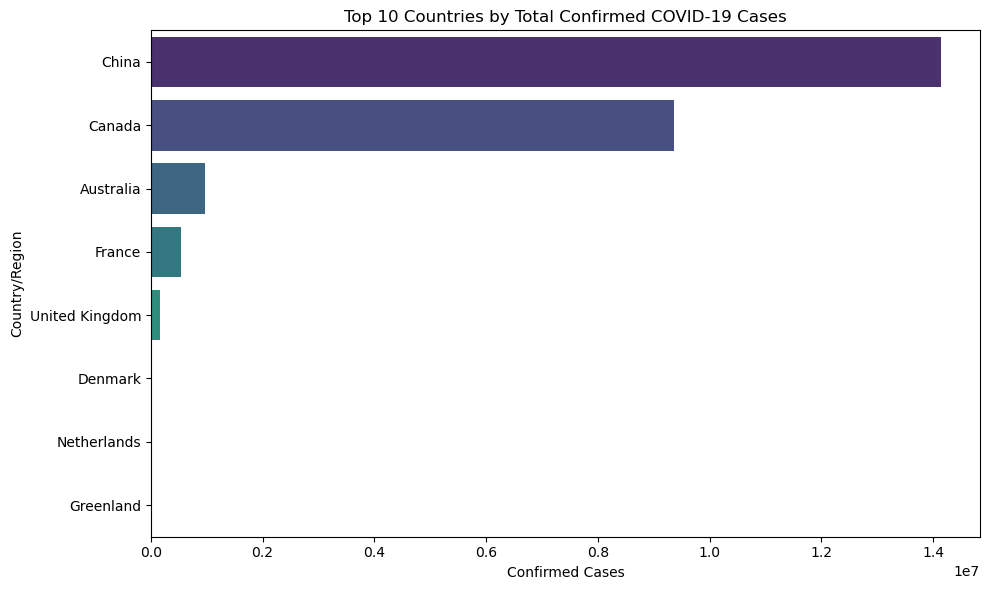

In [12]:
# Group by country to get total confirmed cases
country_trends = df_cleaned.groupby('Country/Region').agg({'Confirmed': 'sum'}).reset_index()

# Sort countries by confirmed cases
top_countries = country_trends.sort_values(by='Confirmed', ascending=False).head(10)

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()


In [ ]:
# Scatter plot for Confirmed vs Deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df_cleaned, alpha=0.5, color='red')
plt.title('Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

# Scatter plot for Confirmed vs Recovery Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Confirmed', y='Recovery_Rate', data=df_cleaned, alpha=0.5, color='green')
plt.title('Confirmed vs Recovery Rate')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovery Rate')
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for the Nigeria
Nigeria_data = df_cleaned[df_cleaned['Country/Region'] == 'Nigeria']

# Group by date for Nigeria
Nigeria_trends = usa_data.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Plot the trend for Nigeria
plt.figure(figsize=(12, 6))
plt.plot(usa_trends['Date'], usa_trends['Confirmed'], label='Confirmed', color='blue', linewidth=2)
plt.plot(usa_trends['Date'], usa_trends['Deaths'], label='Deaths', color='red', linewidth=2)
plt.plot(usa_trends['Date'], usa_trends['Recovered'], label='Recovered', color='green', linewidth=2)
plt.title('COVID-19 Trends in Nigeria (Confirmed, Deaths, Recovered)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


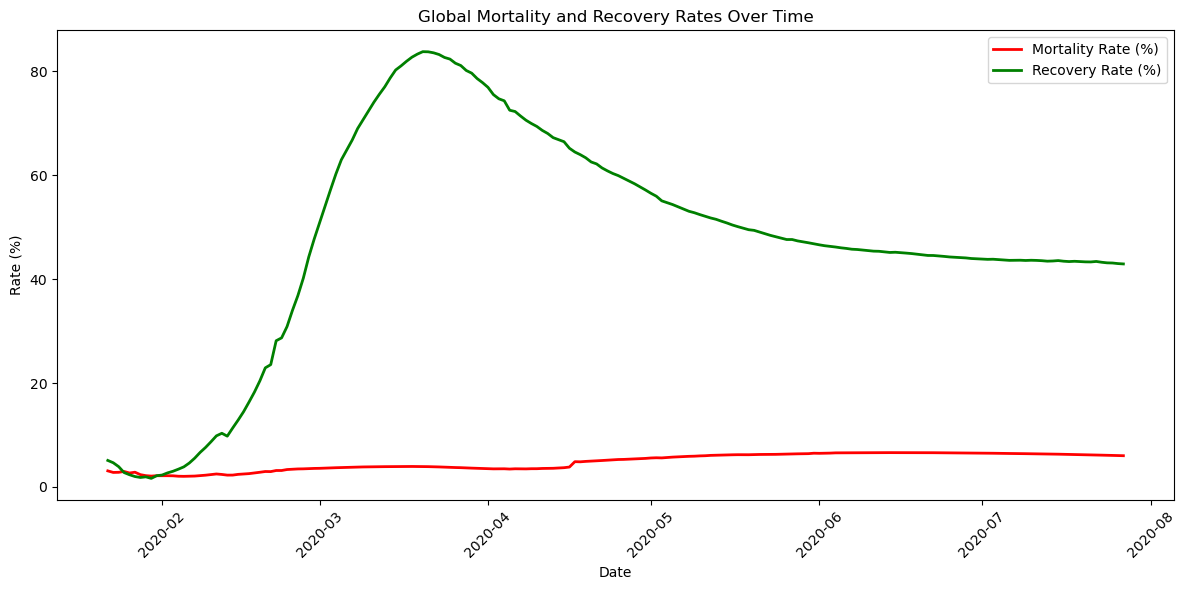

In [16]:
# Calculate Mortality and Recovery Rate
global_trends['Mortality_Rate'] = (global_trends['Deaths'] / global_trends['Confirmed']) * 100
global_trends['Recovery_Rate'] = (global_trends['Recovered'] / global_trends['Confirmed']) * 100

# Plot Mortality and Recovery Rate
plt.figure(figsize=(12, 6))
plt.plot(global_trends['Date'], global_trends['Mortality_Rate'], label='Mortality Rate (%)', color='red', linewidth=2)
plt.plot(global_trends['Date'], global_trends['Recovery_Rate'], label='Recovery Rate (%)', color='green', linewidth=2)
plt.title('Global Mortality and Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Group by country for recovery and mortality rates
country_rates = df_cleaned.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Calculate the rates
country_rates['Mortality_Rate'] = (country_rates['Deaths'] / country_rates['Confirmed']) * 100
country_rates['Recovery_Rate'] = (country_rates['Recovered'] / country_rates['Confirmed']) * 100

# Sort by confirmed cases and take top 10
top_country_rates = country_rates.sort_values(by='Confirmed', ascending=False).head(10)

# Plot recovery and mortality rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Mortality_Rate', data=top_country_rates, color='red', label='Mortality Rate')
sns.barplot(x='Country/Region', y='Recovery_Rate', data=top_country_rates, color='green', label='Recovery Rate')
plt.title('Top 10 Countries by Mortality and Recovery Rates')
plt.xlabel('Country')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Select numerical columns for correlation analysis
correlation_data = df_cleaned[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Lat', 'Long']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for COVID-19 Data')
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Date' to datetime type if not already done
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Create a new feature that is the number of days since the first date
df_cleaned['Days'] = (df_cleaned['Date'] - df_cleaned['Date'].min()).dt.days

# Select features for the model (Confirmed cases as target, and other columns as predictors)
features = ['Days', 'Deaths', 'Recovered', 'Active']
target = 'Confirmed'

# Prepare the data for modeling
X = df_cleaned[features]
y = df_cleaned[target]


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(11731, 4) (2933, 4) (11731,) (2933,)


In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficients of the model
print("Model Coefficients:", model.coef_)


Model Coefficients: [3.13173525e-14 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [22]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4.568023054358098e-12
R-squared: 1.0


In [ ]:
# Example prediction for the next 10 days (inputting known data)
future_days = pd.DataFrame({
    'Days': [df_cleaned['Days'].max() + i for i in range(1, 11)],
    'Deaths': [df_cleaned['Deaths'].iloc[-1]] * 10,  # assuming death rate stays constant
    'Recovered': [df_cleaned['Recovered'].iloc[-1]] * 10,  # assuming recovery stays constant
    'Active': [df_cleaned['Active'].iloc[-1]] * 10,  # assuming active cases stay constant
})

# Predict future confirmed cases
future_predictions = model.predict(future_days)

# Display predictions for the next 10 days
print(f"Future Predictions (Confirmed Cases): {future_predictions}")


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
# Assuming 'Confirmed' is the target variable, and the other columns are features
X = df[['Daily_Confirmed', 'Mortality_Rate', 'Recovery_Rate']]  # Example feature columns
y = df['Confirmed']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

